In [9]:
import matplotlib.pyplot as plt
import numpy as np
x_data = [ 388., 333., 328., 207., 226., 25., 179., 60., 208.,  606.]
y_data = [ 640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
# ydata = b + w * xdata

In [10]:
x = np.arange(-200,-100,1) #bias
y = np.arange(-5,5,0.1)#weight
Z =  np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0
        for n in range(len(x_data)):
            Z[j][i] = Z[j][i] +  (y_data[n] - b - w*x_data[n])**2
        Z[j][i] = Z[j][i]/len(x_data)   

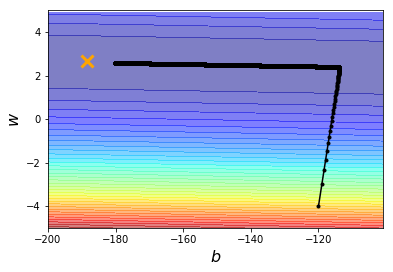

In [14]:
# ydata = b + w *  xdata
b = -120 # initial b
w = -4 # initial w
lr = 1 # Learning rate
iteration =100000

#Store initial values for plotting.
b_history = [b]
w_history = [w]

lr_b = 0
lr_w = 0

#Iterations 在每個Iterations裡面要計算出b&w對Loss的偏微分
for i in range(iteration):
    
    b_grad = 0.0
    w_grad = 0.0
    for n in range(len(x_data)):
        b_grad = b_grad  - 2.0*(y_data[n] - b - w*x_data[n])*1.0
        w_grad = w_grad  - 2.0*(y_data[n] - b - w*x_data[n])*x_data[n]
    
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    # Update parameters.
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    #原本b = b - lr * b_grad #b的偏微分去乘上learning rate update b
    #w = w - lr * w_grad
    
    # Store parameters for plotting
    b_history.append(b)
    w_history.append(w)
    
# plot the figure
plt.contourf(x,y,Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))
plt.plot([-188.4], [2.67], 'x', ms=12, markeredgewidth=3, color='orange')
plt.plot(b_history,w_history, 'o-', ms=3, lw=1.5, color='black')
plt.ylim(-5,5)
plt.xlabel(r'$b$', fontsize=16)
plt.ylabel(r'$w$', fontsize=16)
plt.show()
#顏色代表不同的參數項所得到的LOSS
#Loss在b的-180~-200&w的2~4這邊是最低的,初始在b的-120
#在做Gradient Descent的時候 參數從一開始的w=-4開始變化update到w=3那邊 往上走
#但在經過10萬次的Iteration之後 可以看到我們離最佳解(叉叉)還有很大段的距離,顯然是learning rate 不夠大的問題
#之後便調整learning rate 但是當調整learning rate之後 調到10倍 有靠近一些 當到100倍時,learning rate太大 已超出畫面
#所以只好給b&w製作一個learning rate(11&12&23&24&27&28) 之後learning rate 那邊在直接設為1(原本為0.0000001)